<h2>Model Development</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>Linear Regression and Multiple Linear Regression</h2>

In [2]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm
X = df[['highway-mpg']]
Y = df[['price']]
lm.fit(X, Y)
lm.intercept_

array([38423.30585816])

In [3]:
lm.coef_

array([[-821.73337832]])

In [4]:
y = lm.intercept_ + lm.coef_*25
y

array([[17879.97140011]])

<h3>What is the final estimated linear model we get?</h3>

plugging in the actual values we get
<h4> price = 38423.31 - 821.73 * highway-mpg</h4>

In [5]:
# Create a linear regression object
lm1 = LinearRegression()

In [6]:
# Train the model using 'engine-size' as the independent variable on 'price' as the dependent variable
lm1.fit(df[["engine-size"]], df[["price"]])

LinearRegression()

In [7]:
# Find the slope and intercept of the model
lm1.intercept_

array([-7963.33890628])

In [8]:
lm1.coef_

array([[166.86001569]])

In [9]:
# What is the equation of the predicted line
# price = -7963.34 + 166.86 * engine-size

<h2>Multiple Linear Regression</h2>

What if we want to predict car price using more than one variable ?


If we want to use more variables in our model to predict car price, we can use <b>Multiple linear Regression</b>.Multiple Linear Regression is very simple to Simple Linear Regression, but this method is used to explain the realtionship between one continuos response reponse (dependent) variable and <b>two or more</b> predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using the structure by using four predictor variables, but these results can generalize to any integer.

In [10]:
from sklearn.linear_model import LinearRegression
lm3 = LinearRegression()
lm3
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
#X = z
Y = df['price']
lm3.fit(z, Y)
lm3.intercept_

-15806.624626329198

In [11]:
lm3.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

<h2>The Predicted model is: </h2>

<b>price = -15806.62 + 53.50 * horsepower + 4.71 * curb-weight + 81.53 * endgine-size + 36.06 * highway-mpg</b>

In [12]:
# Create and train a multiple linear regression model
# where the response variable is price and the predictor variable is "normalized-losses" and "highway-mpg"
from sklearn.linear_model import LinearRegression
lm4 = LinearRegression()
X = df[["normalized-losses", "highway-mpg"]]
Y = df[["price"]]
lm4.fit(X, Y)
lm4.intercept_

array([38201.31327246])

In [13]:
lm4.coef_

array([[   1.49789586, -820.45434016]])

In [14]:
# price = 38201.31 + 1.50 * normalized-losses + -820.45 * highway-mpg

<h2>Model Evaluation using Visualization</h2>
<h3>Regression Plot</h3>
<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots. This plot will show a combination of a scattered data points (a scatter plot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

Let's visualize Highway-mpg as potential predictor variable of price:</p>

(0.0, 48180.022951266656)

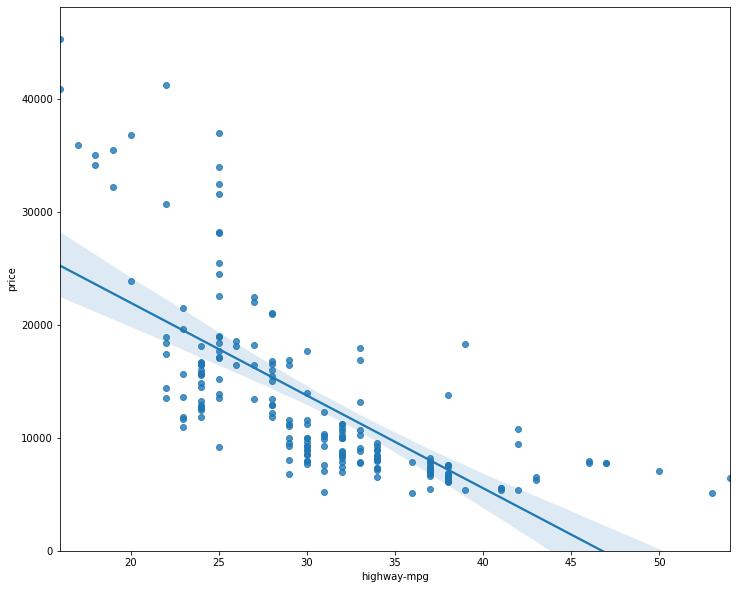

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative. One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".</p>

(0.0, 47414.1)

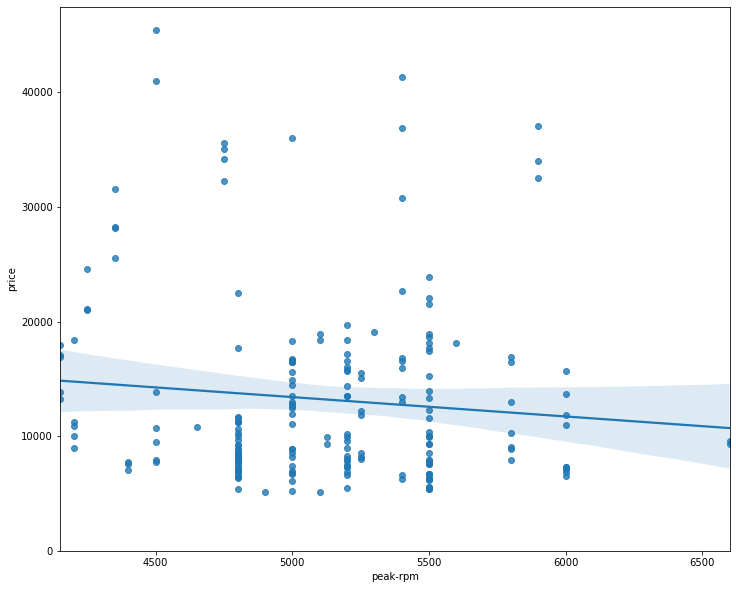

In [16]:
plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.</p>

In [17]:
df[["highway-mpg", "peak-rpm", "price"]].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


<h2>Residual Plot</h2>

<p>What is residual ?</p>
<p>The differce between the observed value(y) and the predicted value(Yhat) is called the residual(e).When we look at a regression plot, the residual is the distance from the data point to fitted regression line.</p>

<p>So what is residual plot ?<p>
    
<p>A residual plot is graph that shows the residual on the vertical y axis and the independent variable on the horizontal x axis</p>

<p>What do we pay atteention to when looking at a residual plot ?</p>

<p>We look at the spread of the residual:
If the points in a residual plot are randomly spread out around x axis, then a liear model is appropriate for the data. Why is that? Randomly speard out residual means that the variance is constant and thus, the linear model is good fit for this data</p>

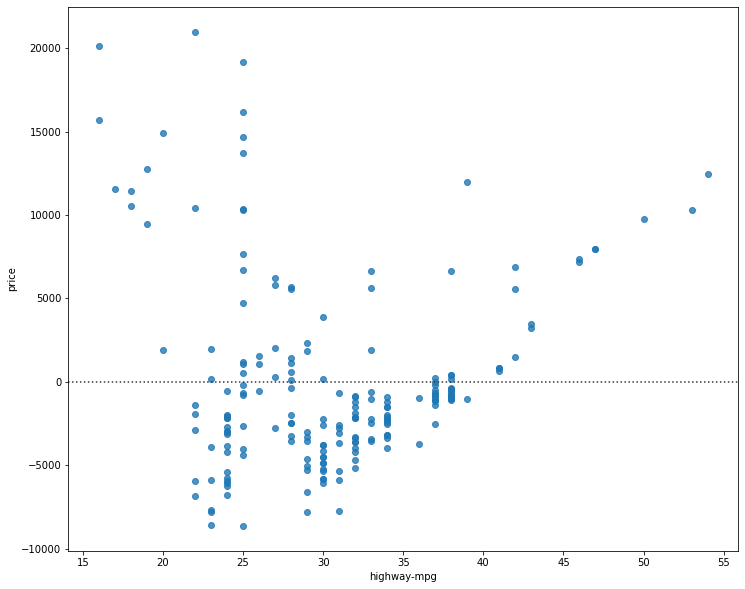

In [18]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x='highway-mpg', y='price', data=df)
plt.show()

<p>What is this plot telling us ?</p>

<p>We can see from this residual plot that the residuals are not randomly spread around the x axis, which leads us to believe that maybe a non-linear model is more appropriate for this data</p>

In [19]:
#plotting multiple linear regression

D:\SoftWares\AnacondaNavigator\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\SoftWares\AnacondaNavigator\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


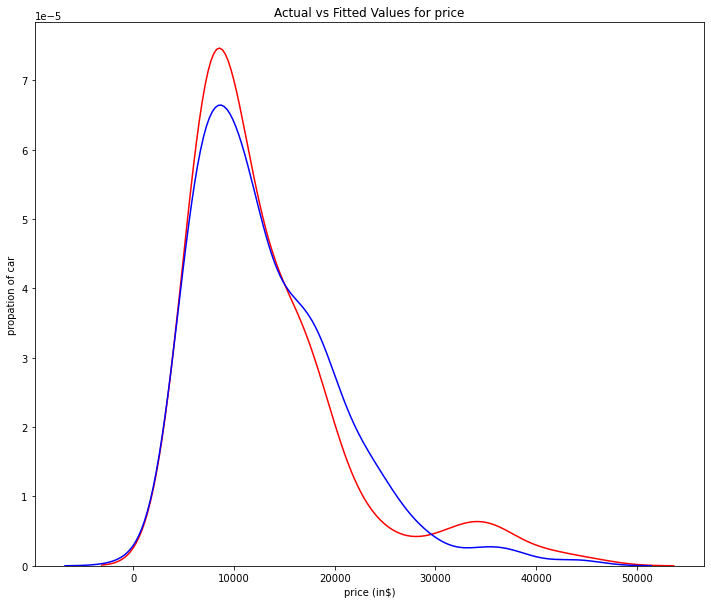

In [20]:
y_hat = lm3.predict(z)
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df['price'], hist=False, color='r', label="Actual Value")
sns.distplot(y_hat, hist=False, color='b', label="Fitted Values", ax=ax1)
plt.title("Actual vs Fitted Values for price")
plt.xlabel("price (in$)")
plt.ylabel("propation of car")
plt.show()
plt.close()

<h3>Polynomial Regression and Pipelines</h3>

<p>There are different orders of Polynomial Regresssion
    $$
    Quadratic
    $$
    $$
    Ythat = b_0 + b_1X + b_2X^2
    $$
    $$
    Cubic
    $$
    $$
    Ythat = b_0 + b_1X + b_2X^2 + b_3X^3
    $$
    $$
    Higher order (N^th order)
    $$
    $$
    Ythat = b_0 + b_1X + b_2X^2 + .....b_nX^n
    $$
</p>
    

In [21]:
X = df['highway-mpg']
Y = df['price']
f = np.polyfit(X, Y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


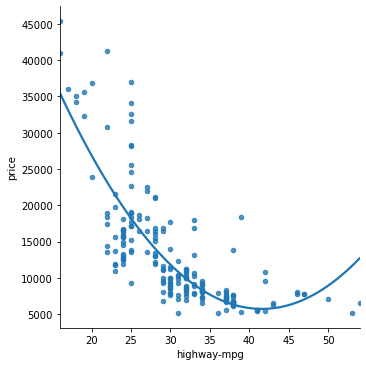

In [22]:
sns.lmplot(x="highway-mpg", y="price", data = df[["highway-mpg", "price"]], order=2, ci=None, scatter_kws={"s":20})

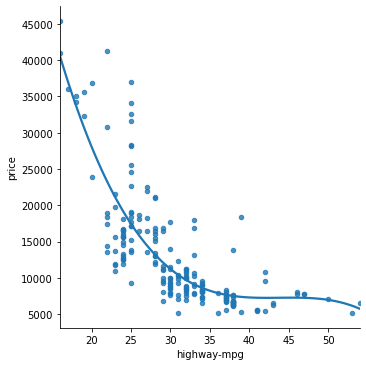

In [23]:
sns.lmplot(x="highway-mpg", y="price", data = df[["highway-mpg", "price"]], order=3, ci=None, scatter_kws={"s":20})

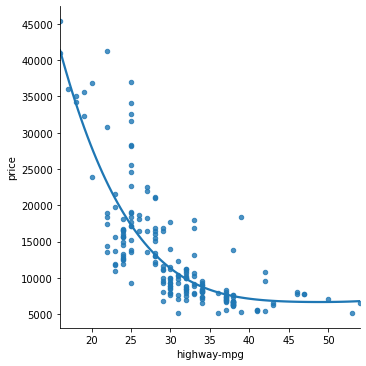

In [24]:
sns.lmplot(x="highway-mpg", y="price", data = df[["highway-mpg", "price"]], order=4, ci=None, scatter_kws={"s":20})

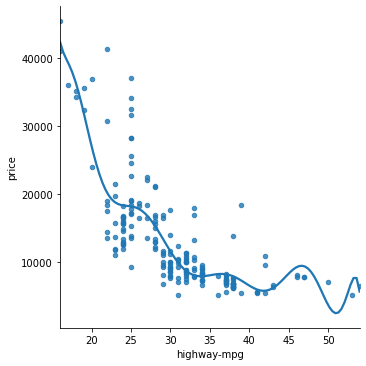

In [25]:
sns.lmplot(x="highway-mpg", y="price", data = df[["highway-mpg", "price"]], order=11, ci=None, scatter_kws={"s":20})

<p>The analytical expression for Multivariate Polynomial function gets complicated.For example, the expression for second-order (degree=2)polunomial with two varaiblesis given by: $$ Yhat = a + b_1X_1 + b_2X_2 + b_4X_4^2 + b_5X_2^2 $$

<h3>Pipeline</h3>

<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline.We also use StandardScaler as a step in our pipelines.</p>

<h3>Measues of In-Sample Evaluation</h3>
<p>Two Measures to determine the accuracy of a model</p>
<ol>
    1.R^2/R-Squared
    <br>
    2.Mean Squared Error (MSE)
</ol>

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm
X = df[['highway-mpg']]
Y = df[['price']]
lm.fit(X, Y)
#R-Squared
lm.score(X, Y)

0.4965911884339176

In [27]:
#MSE for simple linear regression
from sklearn.metrics import mean_squared_error
Yhat = lm.predict(X)
mse = mean_squared_error(df['price'], Yhat)
mse

31635042.944639888

In [28]:
#R-Squared for multiple linear regression
lm.fit(z, Y)
lm.score(z, df['price'])

0.8093562806577457

In [29]:
#MSE for multiple linear regression
Y_predict = lm.predict(z)
mse = mean_squared_error(df['price'], Y_predict)
mse

11980366.870726492

In [30]:
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
from sklearn.metrics import r2_score
x = df['highway-mpg']
r_squared = r2_score(y, p(x))
r_squared

0.6741946663906517

In [31]:
mean_squared_error(df['price'], p(x))

20474146.426361226